In [1]:
# Importando algunas librerías que utilizaremos
#CHACON VIDAL CARLA NICOL
#218011733
# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd
# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
#Tabla_de_datos_viajes+cod
iata_bolivia = pd.read_csv('iata_bolivia.csv')
iata_bolivia.head(7)

,code,ubicacion
0,Avv stz,Santa Cruz
1,Acb cbb,Cochabamba
2,Orr Orr,Oruro
3,ABn Bn,Beni
4,Asc sc,Santa Cruz
5,Lpb lpz,La Paz
6,Atrj Trj,Tarija


In [3]:
iata_bolivia.set_index(["code"], inplace=True)
iata_bolivia.head()

,ubicacion
code,
Avv stz,Santa Cruz
Acb cbb,Cochabamba
Orr Orr,Oruro
ABn Bn,Beni
Asc sc,Santa Cruz


In [4]:
iata_bolivia.loc["Avv stz"]

ubicacion    Santa Cruz
Name: Avv stz, dtype: object

In [5]:
#Datos_distancia_precio de origen y destino
bolivia = pd.read_csv("sample_bolivia.csv")
bolivia.head(8)

,origen,destino,distancia,precio
0,Avv stz,Atrj Trj,900,500
1,Avv stz,Acb cbb,700,450
2,Avv stz,Orr Orr,1000,900
3,Avv stz,Lpb lpz,1200,1200
4,Atrj Trj,ABn Bn,700,350
5,Orr Orr,ABn Bn,900,550
6,Asc sc,Lpb lpz,400,250
7,Acb cbb,Asc sc,500,350


In [6]:
#DG=Grafo dirigido
DG=nx.DiGraph()
for row in bolivia.iterrows():
    DG.add_edge(row[1]["origen"],
                row[1]["destino"],
                 distancia=row[1]["distancia"],
                precio=row[1]["precio"])

In [7]:
DG.nodes(data=True)

NodeDataView({'Avv stz': {}, 'Atrj Trj': {}, 'Acb cbb': {}, 'Orr Orr': {}, 'Lpb lpz': {}, 'ABn Bn': {}, 'Asc sc': {}})

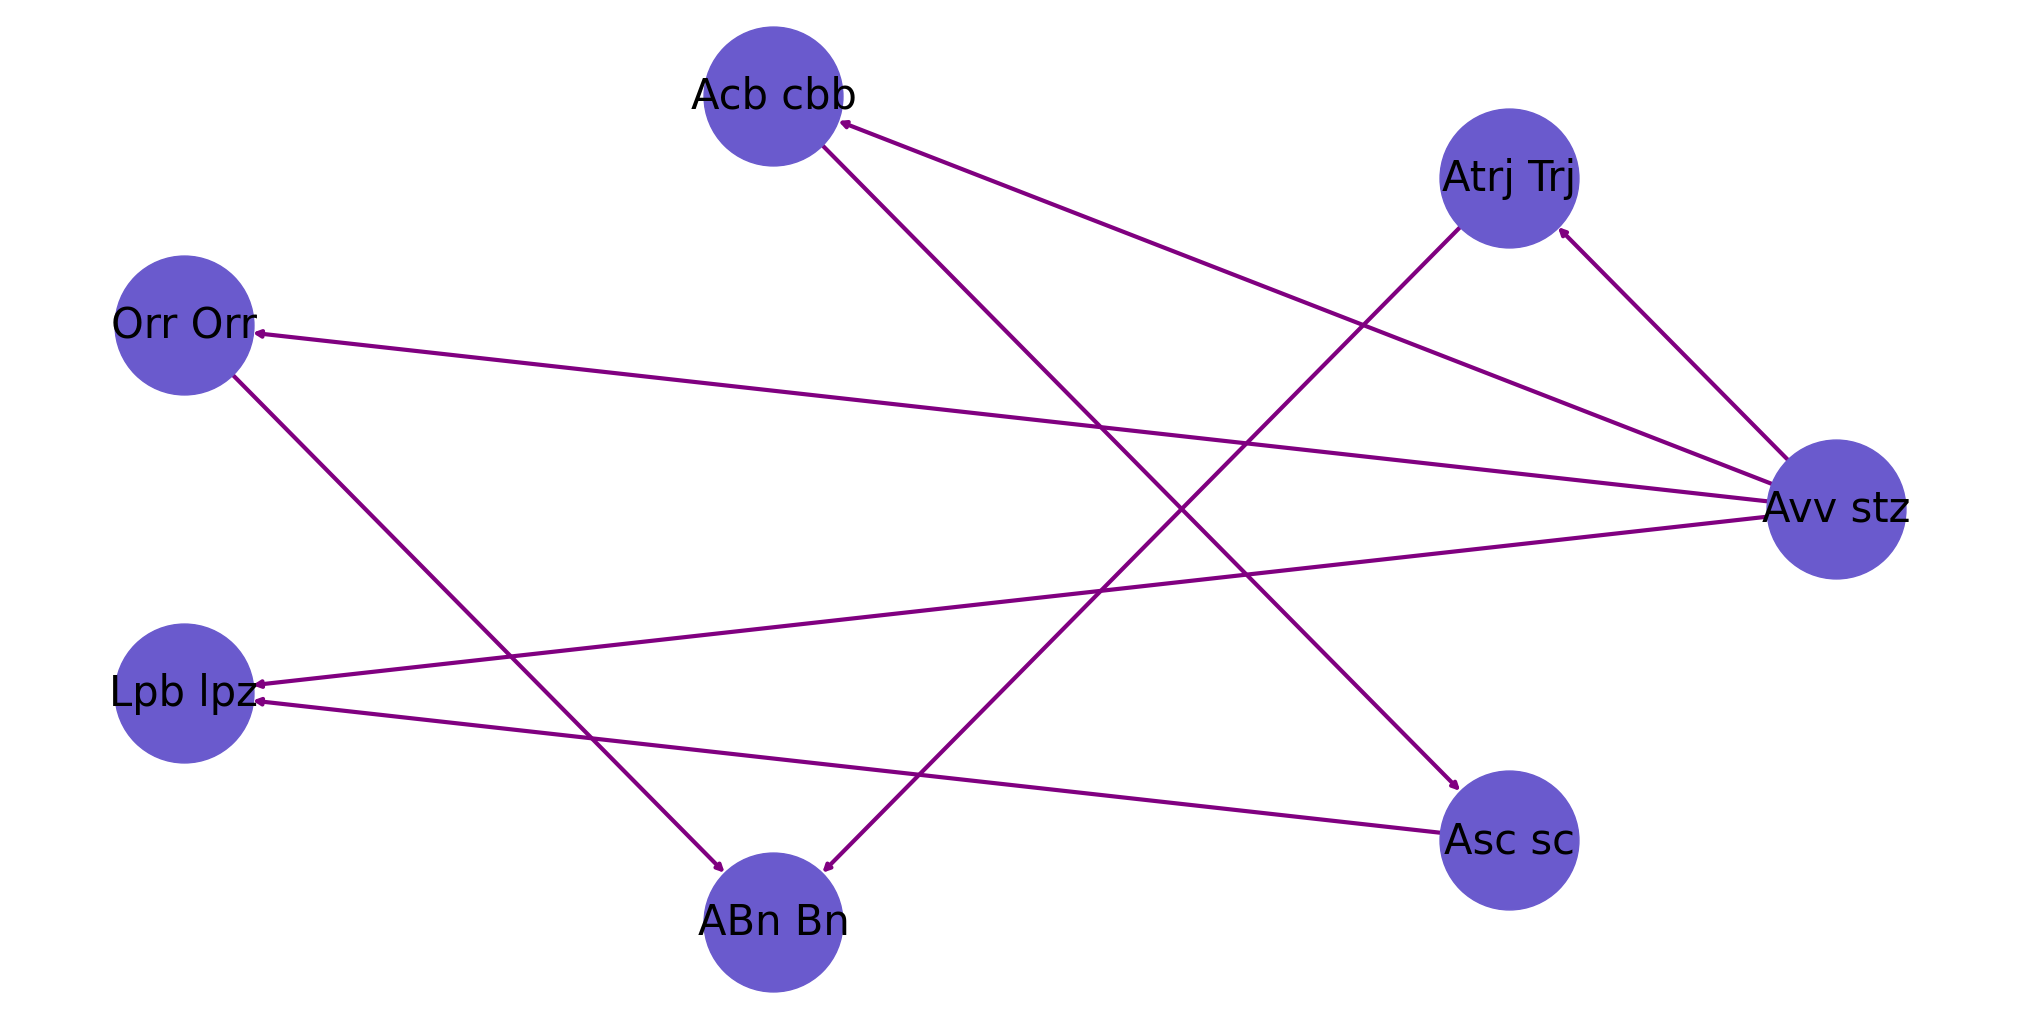

In [8]:
#interface_de_grafos
nx.draw_circular(DG,
                 node_color="slateblue",
                 edge_color="purple",
                 font_size=30,
                 width=3, with_labels=True, node_size=10000,
)

In [9]:
list(nx.all_shortest_paths(DG, source="Avv stz", target="Lpb lpz", weight=None))

[['Avv stz', 'Lpb lpz']]

In [10]:
#Operacion_de_distancia y precio 
def show_path(path):
    total_precio = 0
    total_distancia= 0
    
    for i in range(len(path)-1):
        origen = path[i]
        destino = path[i+1]
        duration = DG[origen][destino]["distancia"]
        precio = DG[origen][destino]["precio"]
        total_precio = total_precio+precio
        total_distancia = total_distancia+duration
        print("    %s -> %s\n    - distancia: %s Km precio: %s Bs" % (
            iata_bolivia.loc[origen]["ubicacion"],
            iata_bolivia.loc[destino]["ubicacion"],
            duration, precio)
        )
    
    print("\n     Total distancia: %s Km Total precio: %s Bs \n" % (
            total_distancia, total_precio)
    )

In [11]:
#distancia
show_path(['Avv stz','Lpb lpz'])

    Santa Cruz -> La Paz
    - distancia: 1200 Km precio: 1200 Bs

     Total distancia: 1200 Km Total precio: 1200 Bs 



In [12]:
#Todos los caminos más cortos y precio
def get_all_shortest_paths(DiGraph, origen, destino):
    print("*** All shortest paths - Origen: %s Destino: %s" % (
        origen, destino
    ))
    for weight in ["distancia", "precio"]:
        print("* Ordenando por: %s" % weight)
        paths = list(nx.all_shortest_paths(DiGraph,
                                          source=origen,
                                          target=destino,
                                          weight=weight))
        for path in paths:
            print("   Camino óptimo: %s" % path)
            show_path(path)
    

In [13]:
#muestra operacion de rutas de camino corto y precio barato
get_all_shortest_paths(DG,  origen="Avv stz", destino="Lpb lpz")

*** All shortest paths - Origen: Avv stz Destino: Lpb lpz
* Ordenando por: distancia
   Camino óptimo: ['Avv stz', 'Lpb lpz']
    Santa Cruz -> La Paz
    - distancia: 1200 Km precio: 1200 Bs

     Total distancia: 1200 Km Total precio: 1200 Bs 

* Ordenando por: precio
   Camino óptimo: ['Avv stz', 'Acb cbb', 'Asc sc', 'Lpb lpz']
    Santa Cruz -> Cochabamba
    - distancia: 700 Km precio: 450 Bs
    Cochabamba -> Santa Cruz
    - distancia: 500 Km precio: 350 Bs
    Santa Cruz -> La Paz
    - distancia: 400 Km precio: 250 Bs

     Total distancia: 1600 Km Total precio: 1050 Bs 



In [14]:
#interface_grafos_trazar el camino más corto
def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='dodgerblue',
                edge_color='black',
                font_size=30,
                width=3, with_labels=True, node_size=10000, alpha=0.8
           )
  
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='fuchsia',
                font_size=30,
                width=3, with_labels=True, node_size=10000
           )
    plt.show()
    

In [15]:
#operacion de sumas de rutas alternativas y precio + parte grafica
#obtener el camino más corto
def get_shortest_path(DiGraph, origen, destino):
    print("*** Origen: %s Destino: %s" % (origen, destino))
    
    for weight in [ "distancia", "precio"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                  (origen),
                                  (destino),
                                  weight=weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        plot_shortest_path(path)


['Avv stz', 'Lpb lpz', 'Avv stz', 'Acb cbb', 'Asc sc', 'Lpb lpz']


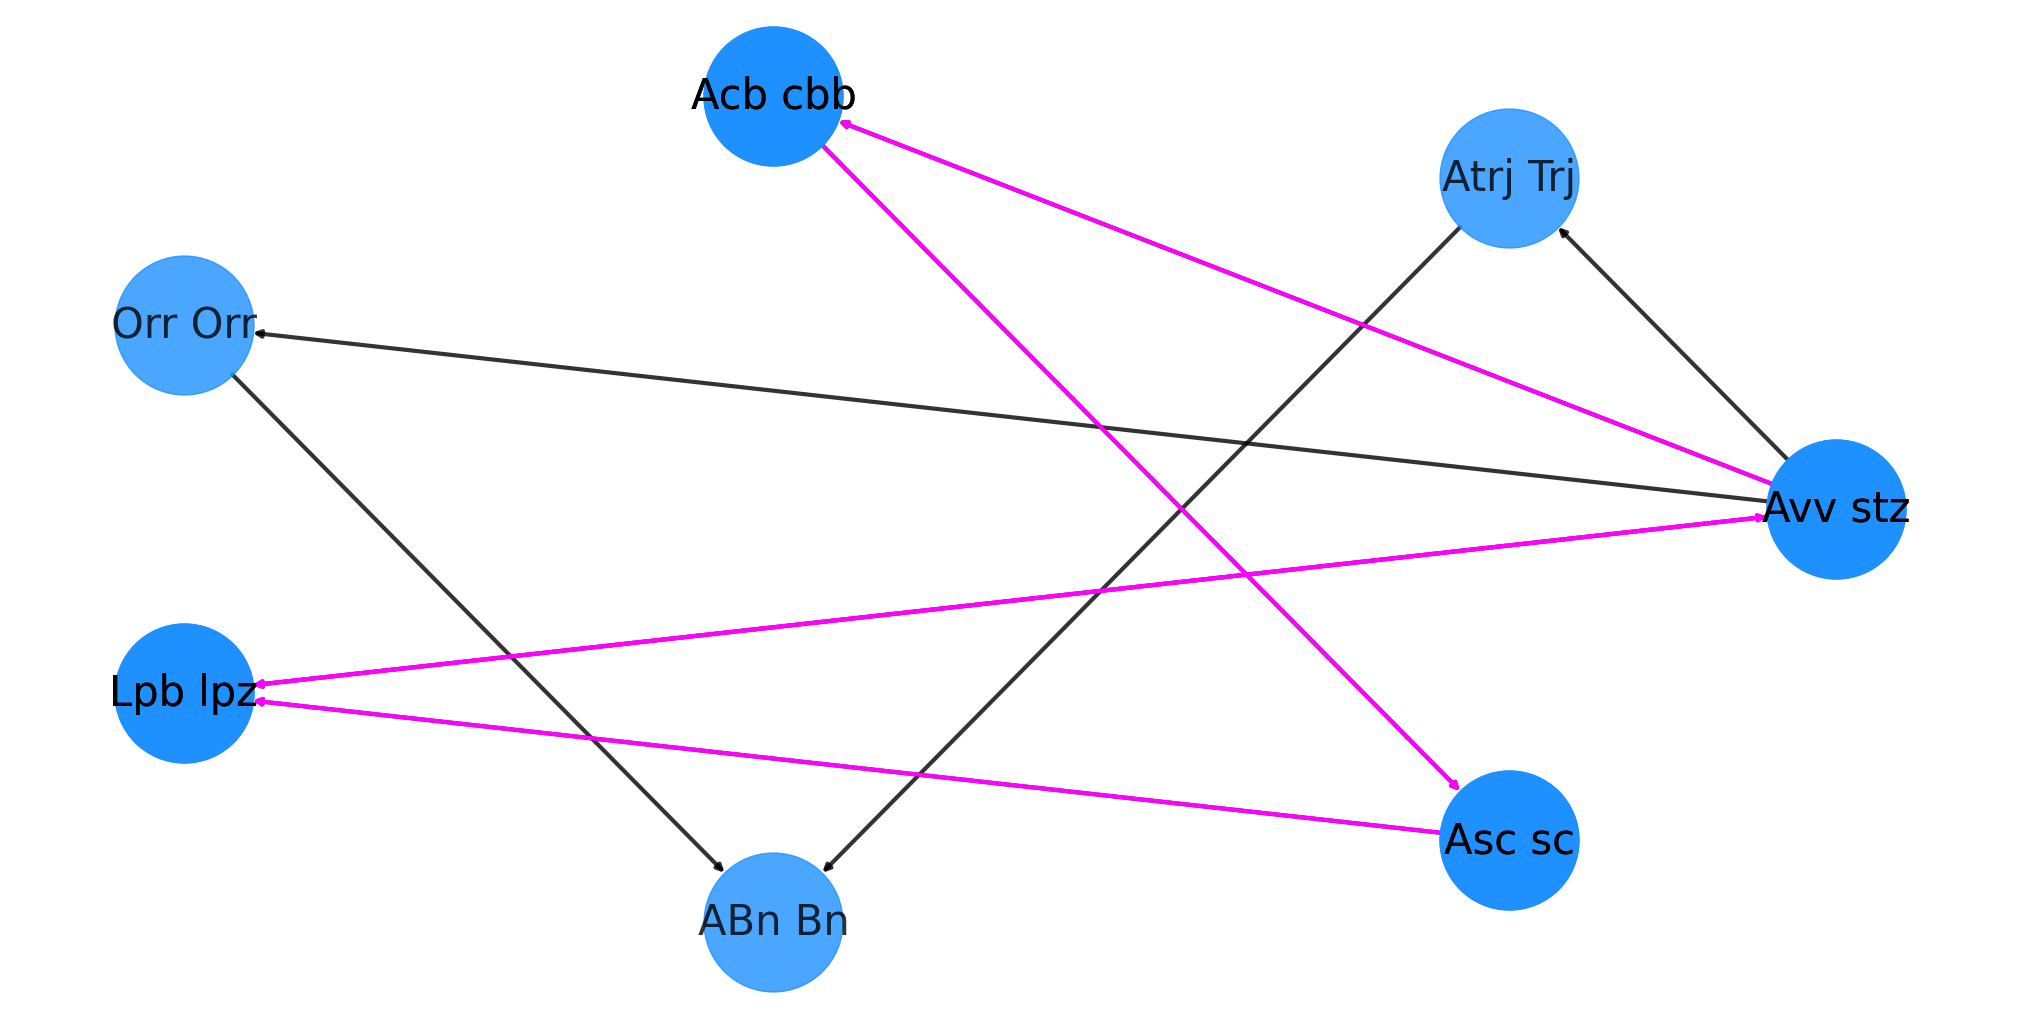

In [16]:
#punto de origen Avv stz a lpb lpz (alternativas de rutas)
#Pregunta1
#mostrar todas las posibles destinos que existan entre el origen stz y lpz e indicar cual es el tramo 
#mas corto
path = [ 'Avv stz', 'Lpb lpz','Avv stz','Acb cbb','Asc sc','Lpb lpz']
plot_shortest_path(path)

*** Origen: Avv stz Destino: Lpb lpz
 Ordenado por: distancia
   Camino óptimo: ['Avv stz', 'Lpb lpz'] 
    Santa Cruz -> La Paz
    - distancia: 1200 Km precio: 1200 Bs

     Total distancia: 1200 Km Total precio: 1200 Bs 

['Avv stz', 'Lpb lpz']


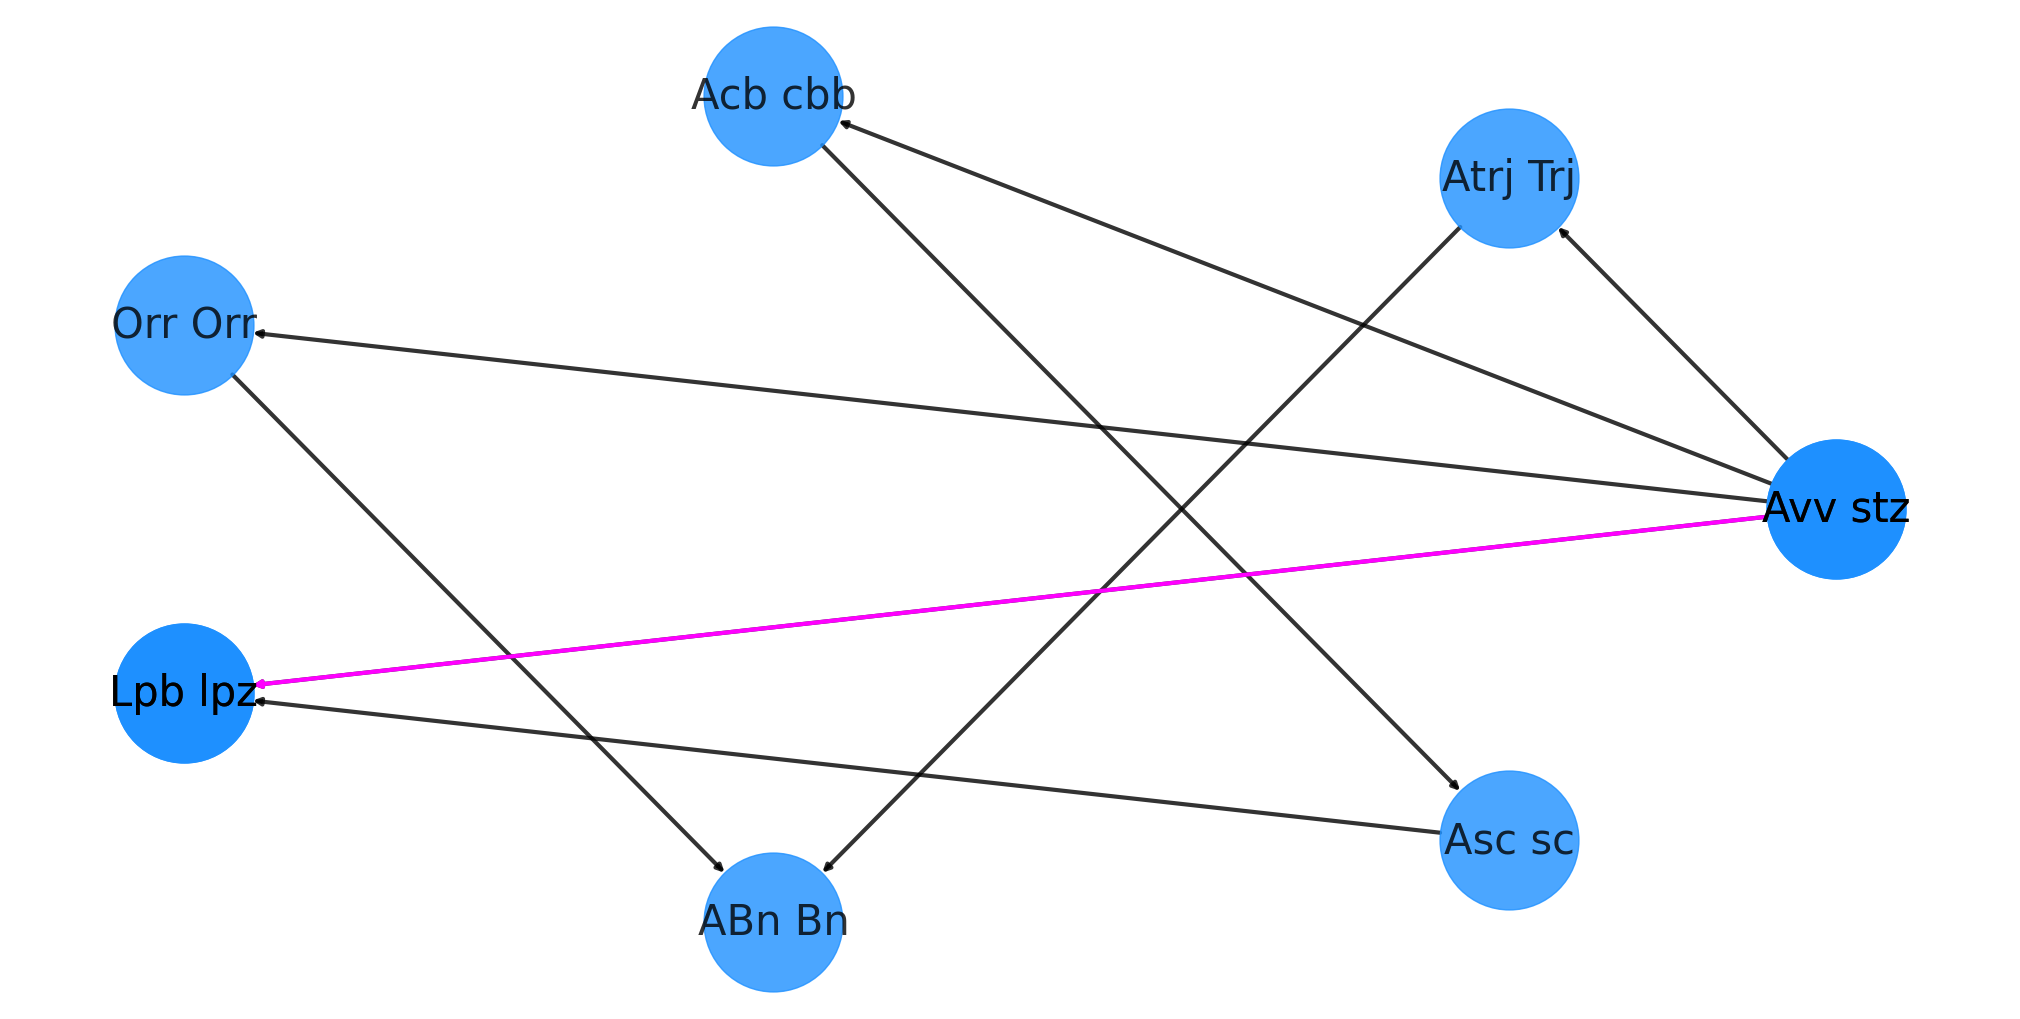

 Ordenado por: precio
   Camino óptimo: ['Avv stz', 'Acb cbb', 'Asc sc', 'Lpb lpz'] 
    Santa Cruz -> Cochabamba
    - distancia: 700 Km precio: 450 Bs
    Cochabamba -> Santa Cruz
    - distancia: 500 Km precio: 350 Bs
    Santa Cruz -> La Paz
    - distancia: 400 Km precio: 250 Bs

     Total distancia: 1600 Km Total precio: 1050 Bs 

['Avv stz', 'Acb cbb', 'Asc sc', 'Lpb lpz']


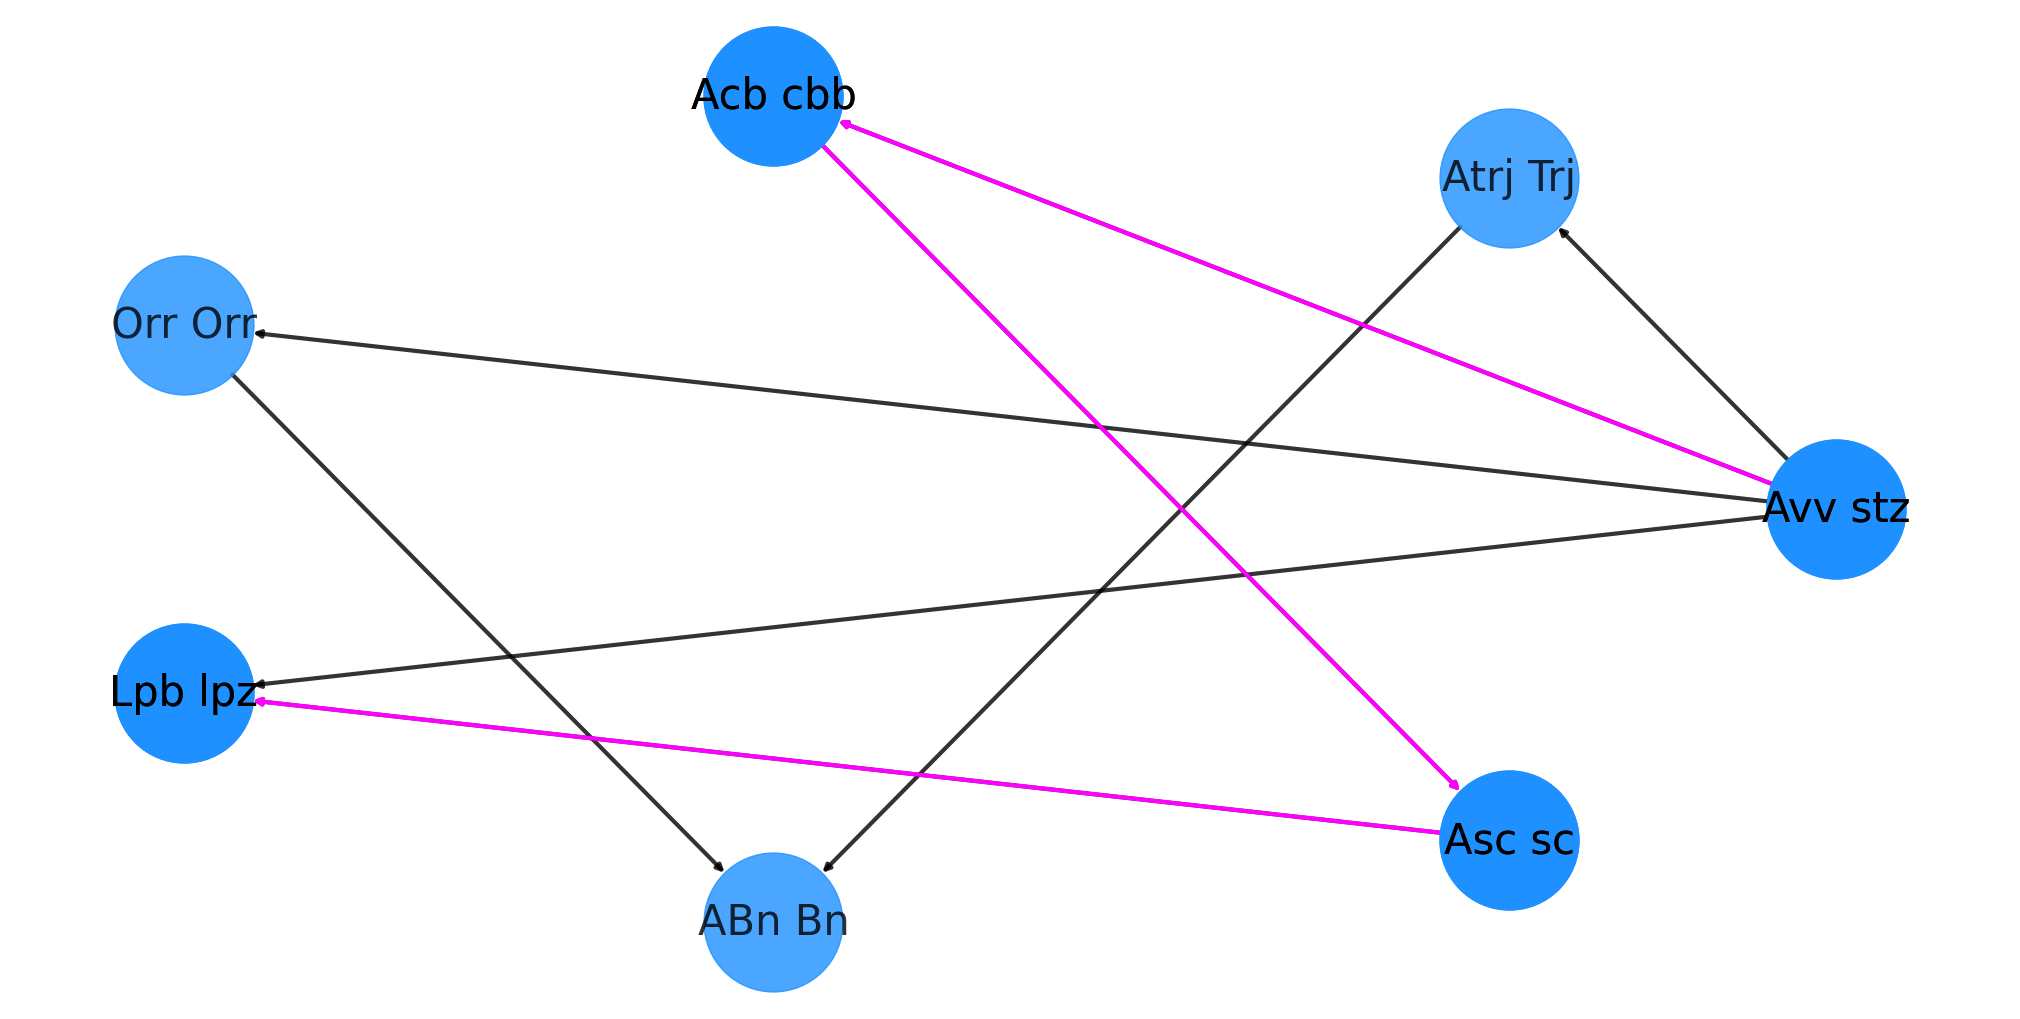

In [17]:
#rutas de camino corto y precio barato mas la parte grafica
#tramo mas cort es de Avv stz  a Lpb lpz con 1200 km
#ordenado por precio se toma la ruta ['Avv stz', 'Acb cbb', 'Asc sc', 'Lpb lpz'] con el precio total 1050
get_shortest_path(DG, origen="Avv stz", destino="Lpb lpz")

*** Origen: Avv stz Destino: ABn Bn
 Ordenado por: distancia
   Camino óptimo: ['Avv stz', 'Atrj Trj', 'ABn Bn'] 
    Santa Cruz -> Tarija
    - distancia: 900 Km precio: 500 Bs
    Tarija -> Beni
    - distancia: 700 Km precio: 350 Bs

     Total distancia: 1600 Km Total precio: 850 Bs 

['Avv stz', 'Atrj Trj', 'ABn Bn']


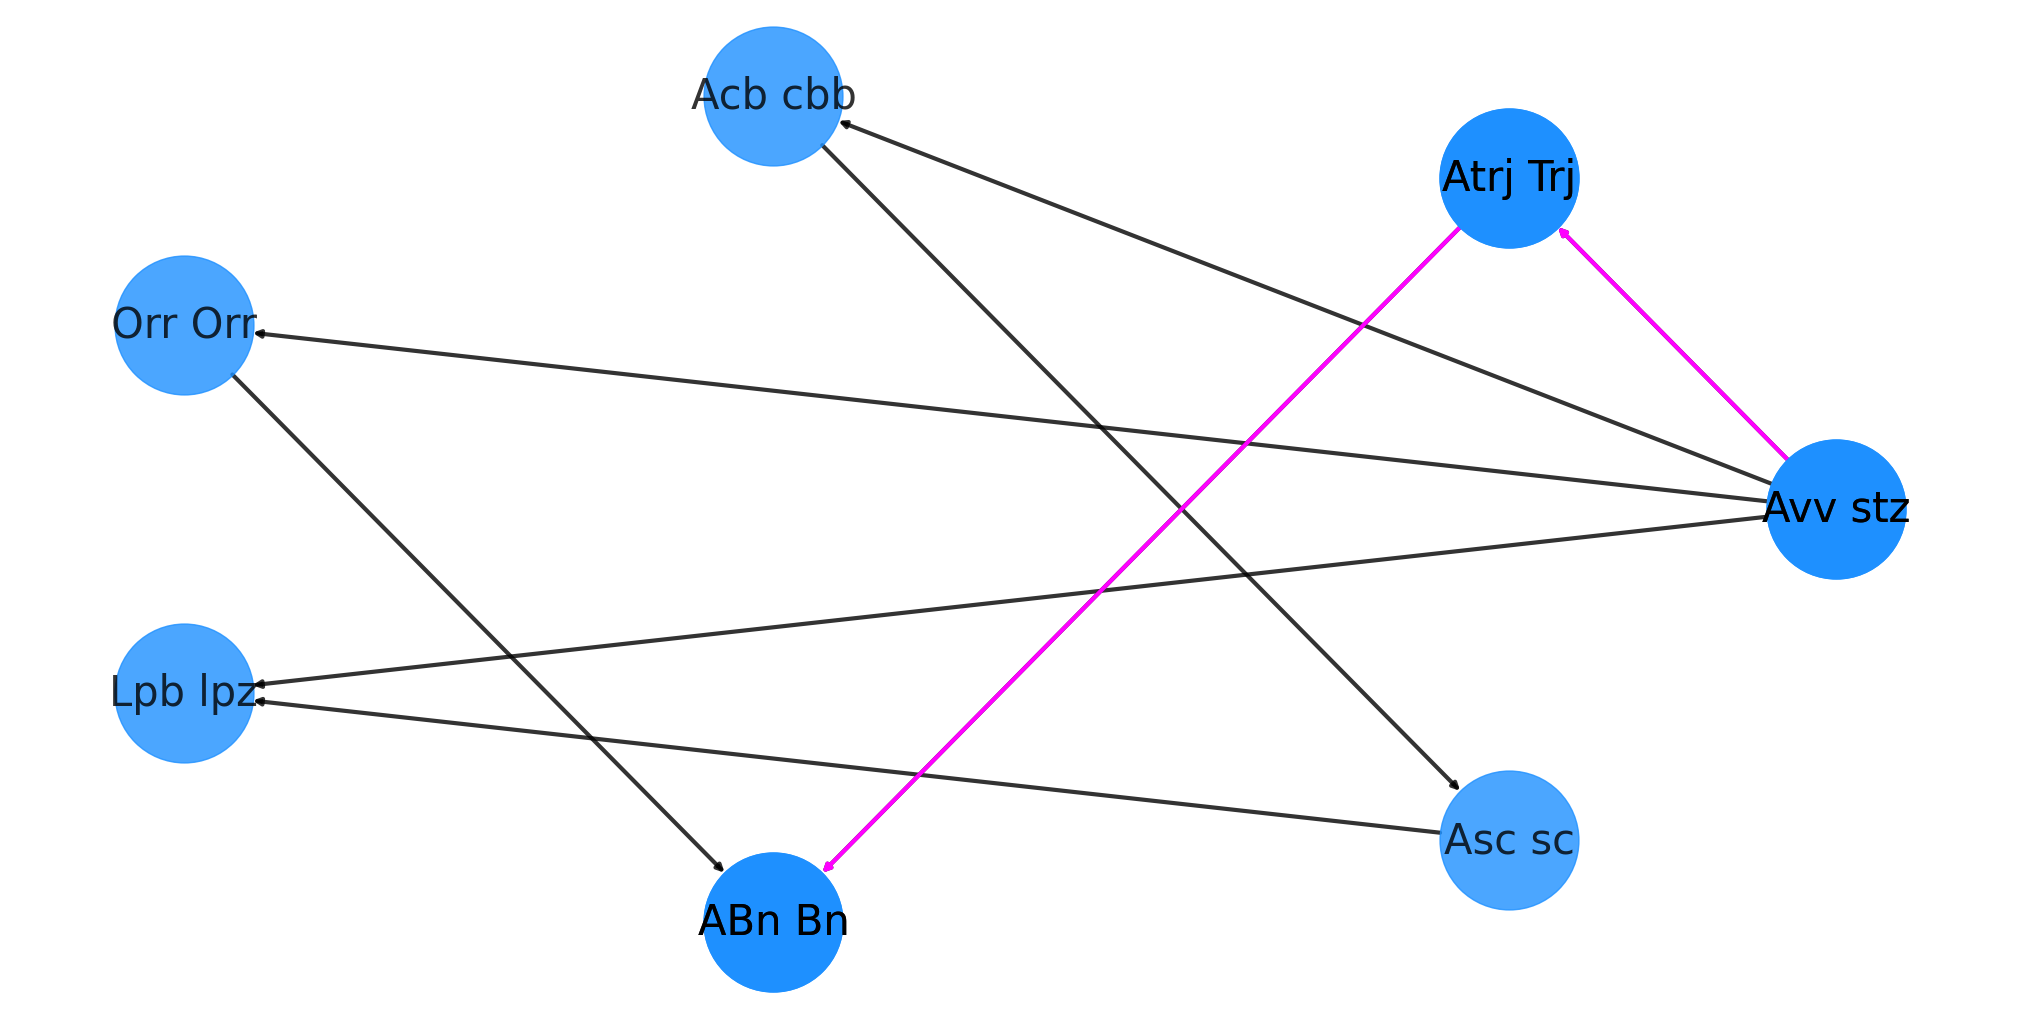

 Ordenado por: precio
   Camino óptimo: ['Avv stz', 'Atrj Trj', 'ABn Bn'] 
    Santa Cruz -> Tarija
    - distancia: 900 Km precio: 500 Bs
    Tarija -> Beni
    - distancia: 700 Km precio: 350 Bs

     Total distancia: 1600 Km Total precio: 850 Bs 

['Avv stz', 'Atrj Trj', 'ABn Bn']


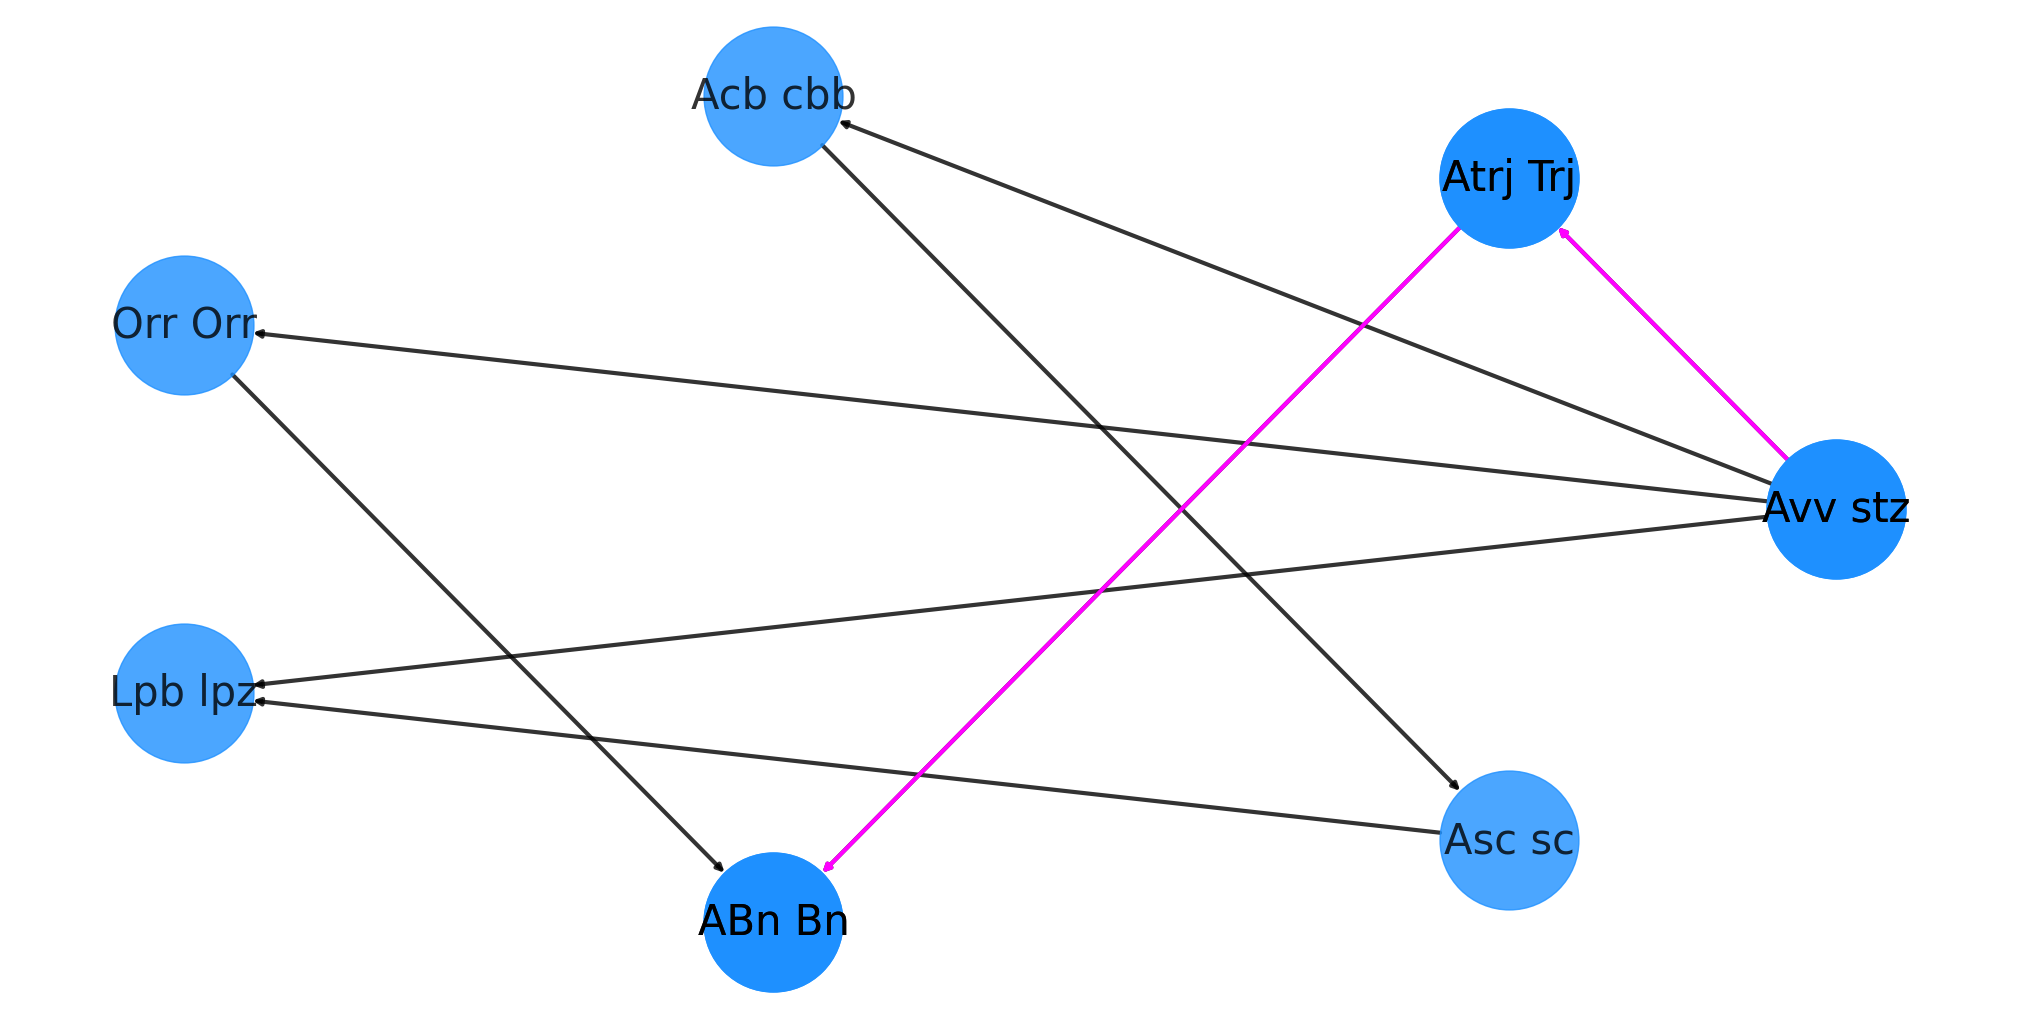

*** Origen: Avv stz Destino: Lpb lpz
 Ordenado por: distancia
   Camino óptimo: ['Avv stz', 'Lpb lpz'] 
    Santa Cruz -> La Paz
    - distancia: 1200 Km precio: 1200 Bs

     Total distancia: 1200 Km Total precio: 1200 Bs 

['Avv stz', 'Lpb lpz']


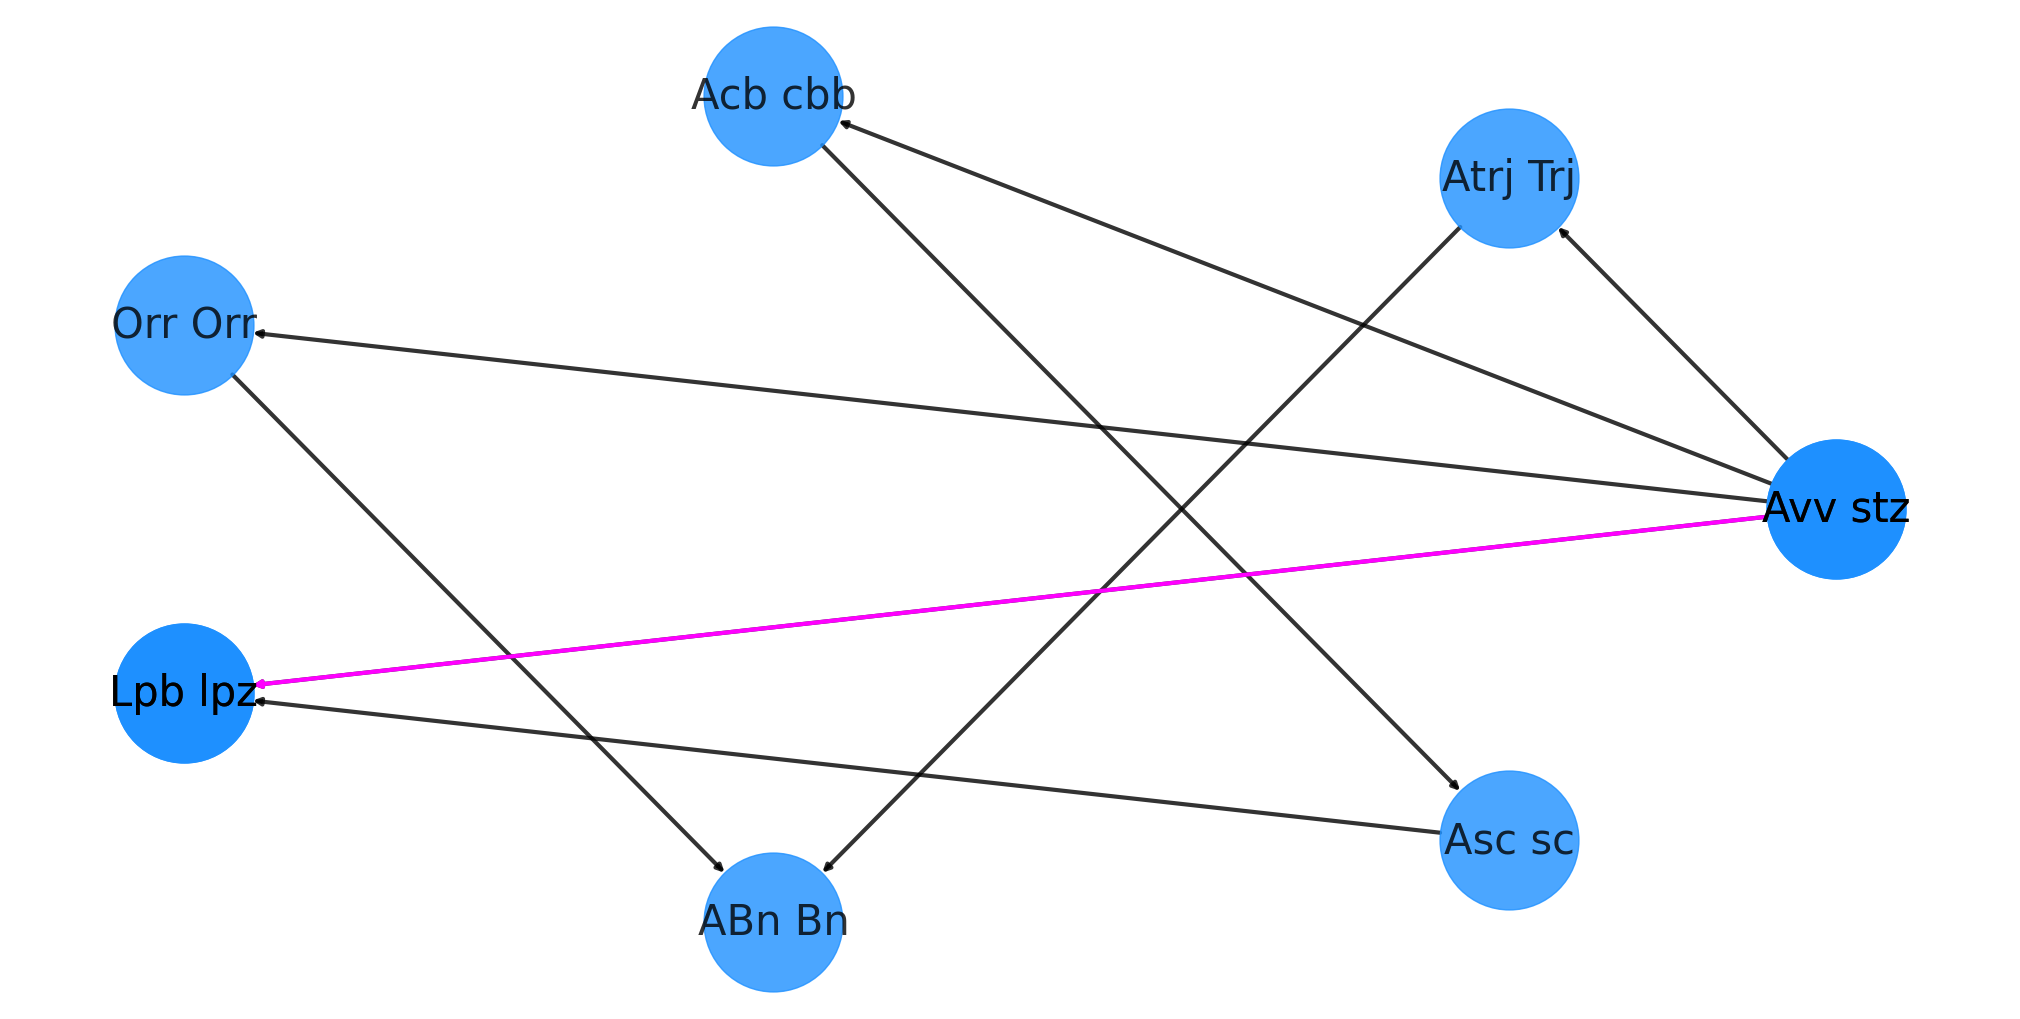

 Ordenado por: precio
   Camino óptimo: ['Avv stz', 'Acb cbb', 'Asc sc', 'Lpb lpz'] 
    Santa Cruz -> Cochabamba
    - distancia: 700 Km precio: 450 Bs
    Cochabamba -> Santa Cruz
    - distancia: 500 Km precio: 350 Bs
    Santa Cruz -> La Paz
    - distancia: 400 Km precio: 250 Bs

     Total distancia: 1600 Km Total precio: 1050 Bs 

['Avv stz', 'Acb cbb', 'Asc sc', 'Lpb lpz']


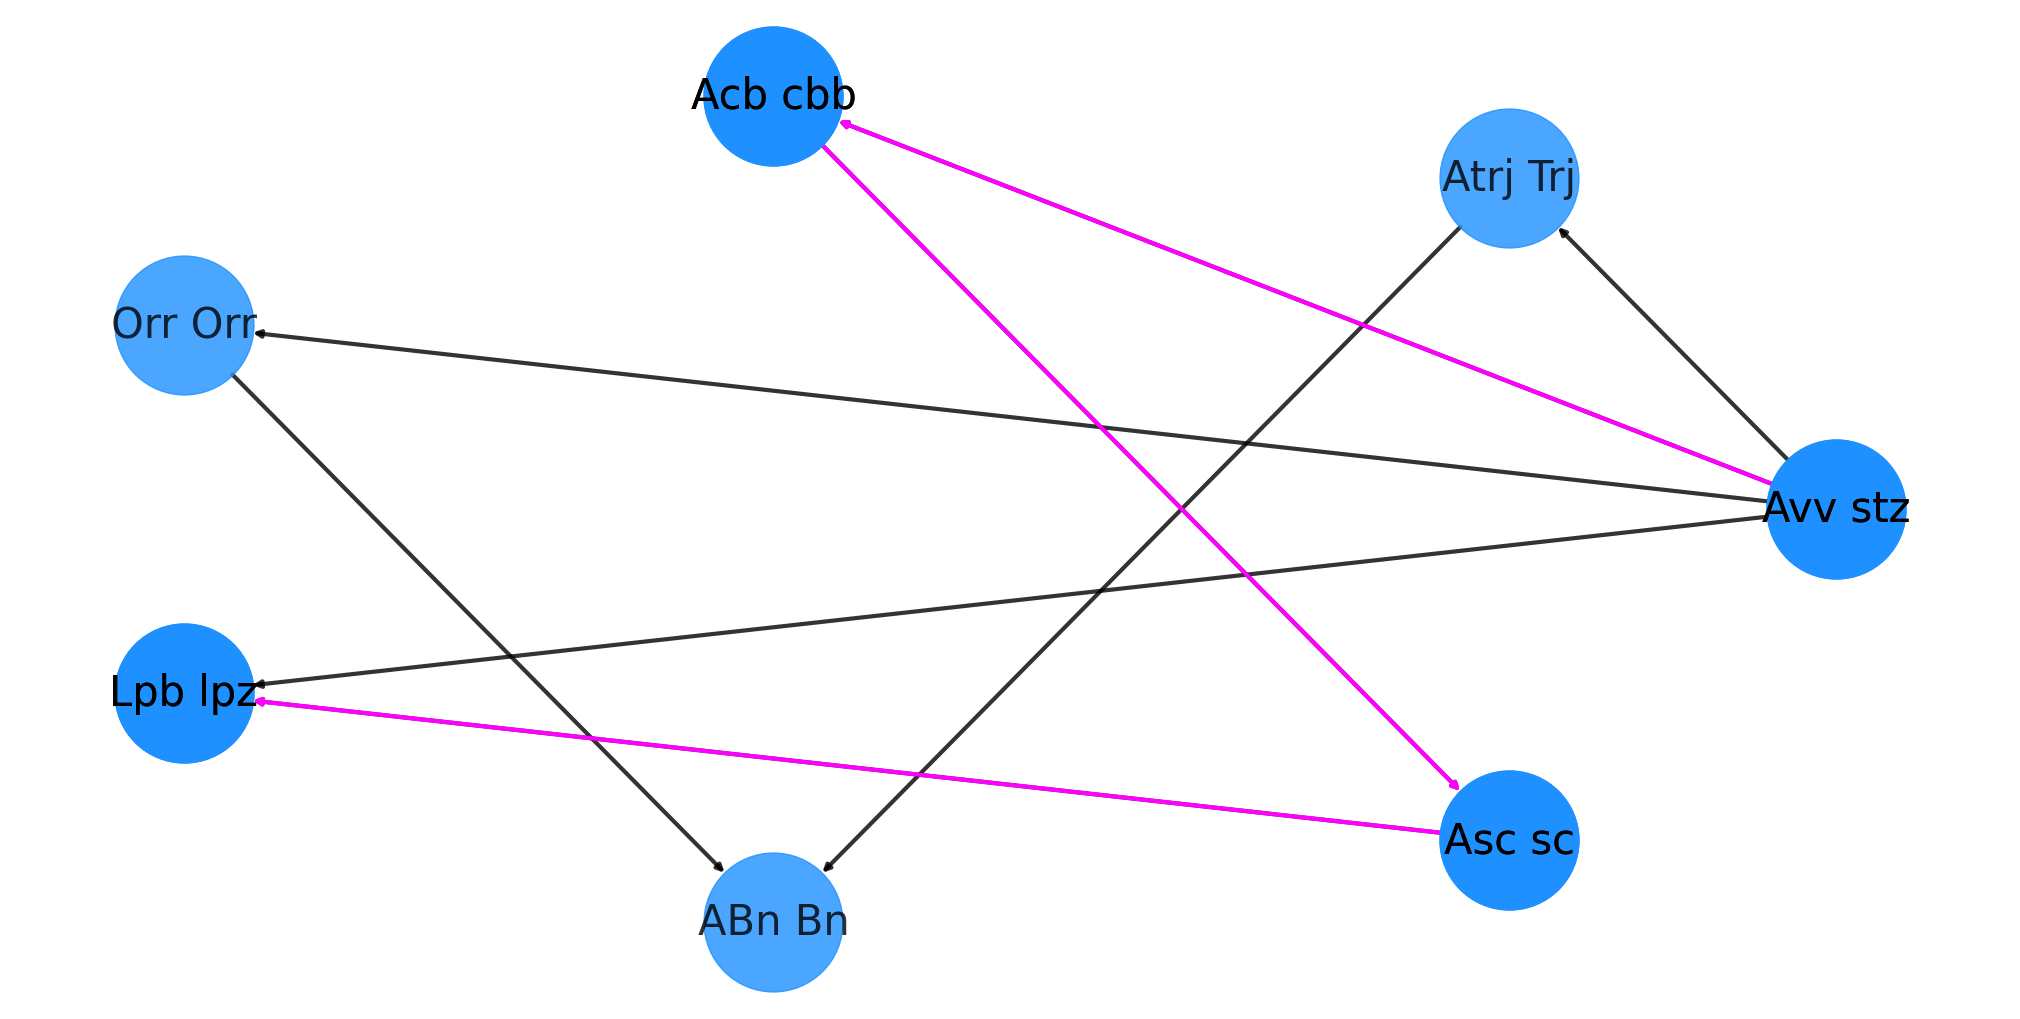

In [18]:
#Pregunta2
#Mostrar cual es el destino mas barato entre santa cruz -lpz y santa cruz -Bn
#la ruta de santa cruz -lpz el precio barato es de 850 bs con camino corto de 1600 km
get_shortest_path(DG, origen="Avv stz", destino="ABn Bn")
#la ruta de santa cruz -Bn el precio barato es de 1050 bs con camino corto de 1200 km
get_shortest_path(DG, origen="Avv stz", destino="Lpb lpz")